## Check whether online bias correction NEMO works as it should

In [1]:
import xarray as xr
import numpy as np
import glob
import cmocean
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/users/birgal/')

Check forcing sum:

'CESM2-LE2_ens1011.001_FSDS_y1850.nc' + 'CESM2-LE2_FSDS_bias_corr_monthly_old_y1850.nc'  = 'CESM2-LE2_ens1011.001_FSDS_bias_corr_monthly_y1850.nc'

In [52]:
cesm2_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/climate-forcing/CESM2/LE2/'
variables = ['FSDS','FLDS','PRECT','PRECS','QREFHT','TREFHT']

for var in variables:
   proc = xr.open_dataset(f'{cesm2_dir}CESM2-LE2_ens1011.001_{var}_y1850.nc')
   bias = xr.open_dataset(f'{cesm2_dir}CESM2-LE2_{var}_bias_corr_monthly_old.nc')

   for month in range(1,13):
       proc[var] = xr.where(proc.time.dt.month==month, bias[var].sel(month=month), proc[var])
       # if var != 'TREFHT':
       #     proc[var] = xr.where(proc[var] < 0, 0, proc[var])
           
   # proc.to_netcdf(f'{cesm2_dir}CESM2-LE2_ens1011.001_{var}_bias_corr_y1850.nc', unlimited_dims=['time'])
   proc.to_netcdf(f'{cesm2_dir}CESM2-LE2_{var}_bias_corr_monthly_old2.nc', unlimited_dims=['time'])

In [34]:
cesm2_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/climate-forcing/CESM2/LE2/'
ts=0
var='PRECS'
FSDS_1850 = xr.open_dataset(f'{cesm2_dir}CESM2-LE2_ens1011.001_{var}_y1850.nc').isel(time=ts)
FSDS_bias = xr.open_dataset(f'{cesm2_dir}CESM2-LE2_{var}_bias_corr_monthly_old.nc').isel(month=0)
# FSDS_1850_bias = xr.open_dataset(f'{cesm2_dir}CESM2-LE2_ens1011.001_FSDS_bias_corr_monthly_y1850.nc')
new_file = xr.open_dataset(f'{cesm2_dir}CESM2-LE2_ens1011.001_{var}_bias_corr_y1850.nc').isel(time=ts)

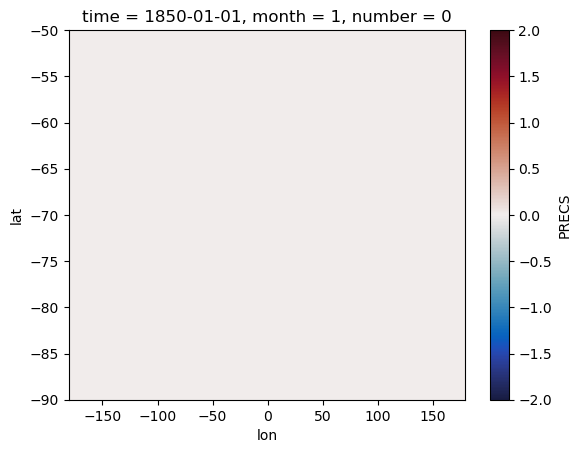

In [35]:
(new_file[var] - (FSDS_1850[var] + FSDS_bias[var])).sortby('lon').plot(ylim=(-90,-50), vmin=-2,vmax=2,cmap=cmocean.cm.balance)

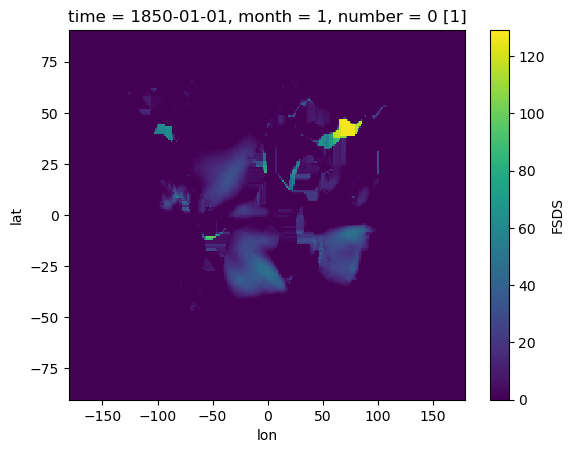

In [51]:
(FSDS_1850_bias.FSDS.isel(time=0) - (FSDS_1850.FSDS + FSDS_bias.FSDS)).sortby('lon').plot()

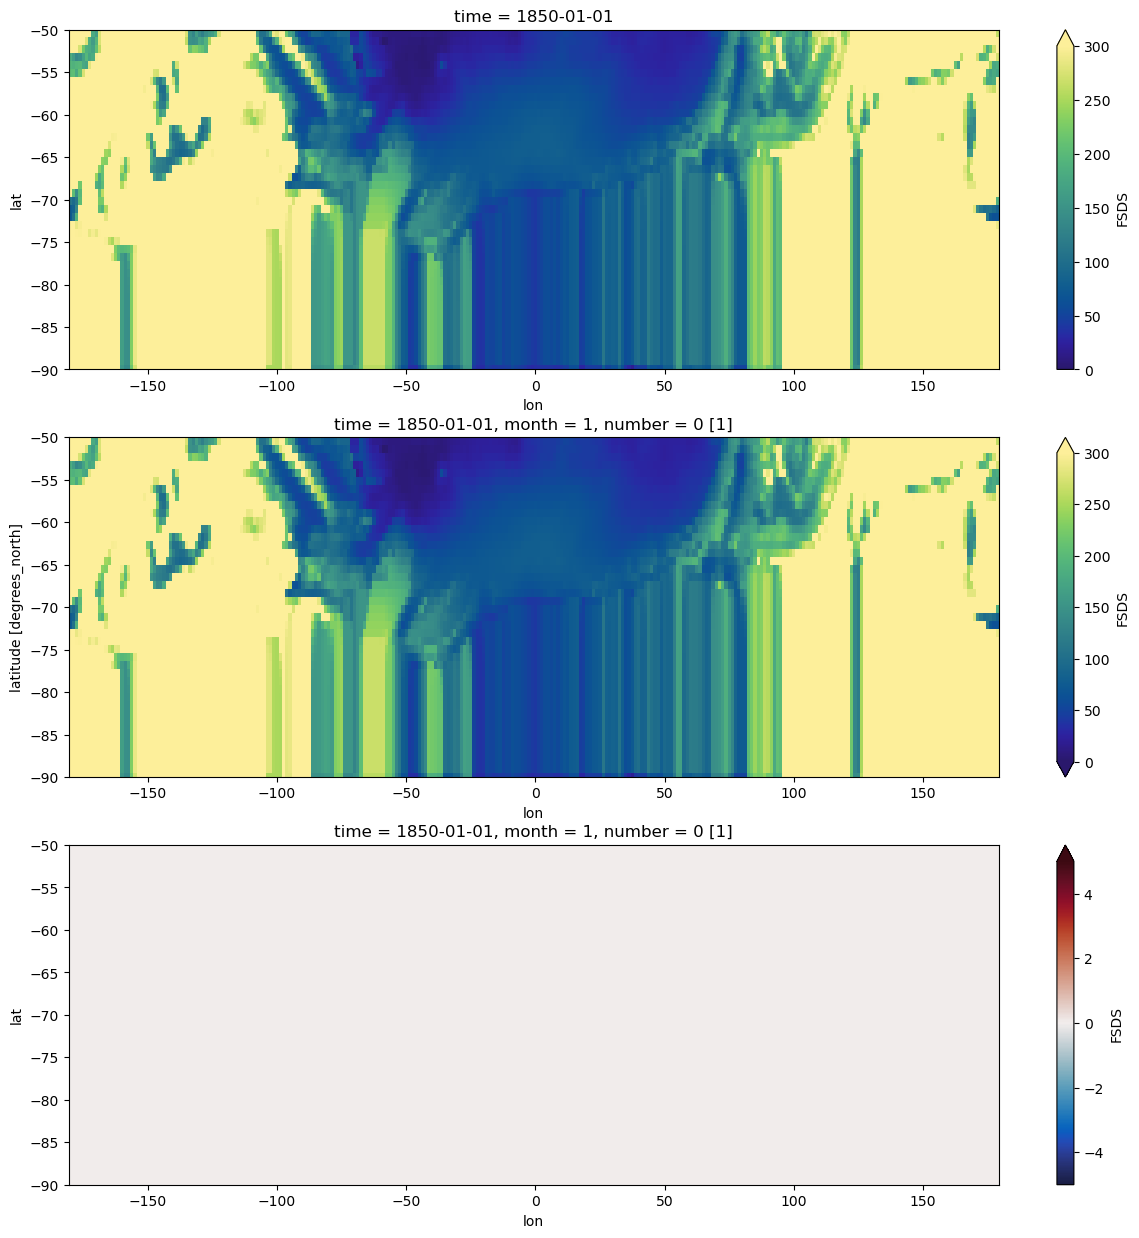

In [28]:
fig, ax = plt.subplots(3,1, figsize=(15,15))
(FSDS_1850_bias.FSDS).isel(time=0).sortby('lon').plot(ax=ax[0], vmin=0, vmax=300, cmap=cmocean.cm.haline, ylim=(-90,-50))
(FSDS_1850.FSDS + FSDS_bias.FSDS).sortby('lon').plot(ax=ax[1], vmin=0, vmax=300, cmap=cmocean.cm.haline, ylim=(-90,-50))
(FSDS_1850_bias.FSDS - (FSDS_1850.FSDS + FSDS_bias.FSDS)).isel(time=0).sortby('lon').plot(ax=ax[2], vmin=-5, vmax=5, cmap=cmocean.cm.balance, ylim=(-90,-50))

Tests:
1. Monthly bias correction on eANT025 grid ON and online --> started (test_bias_corr)
2. Monthly bias correction on CESM2 grid ON and online --> started (test_bias_corr2)
3. Monthly bias correction off, non-bias corrected files
4. Monthly bias correction on CESM2 grid ON and offline (read in already bias-corrected files) --> started(test_bias_corr4)

In [3]:
base_dir   = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
bias1_dir  = f'{base_dir}output/test_bias_corr/files/'
bias2_dir  = f'{base_dir}output/test_bias_corr2/files/'
bias3_dir  = f'{base_dir}output/test_bias_corr3/files/'
bias4_dir  = f'{base_dir}output/test_bias_corr4/files/'
cesm2_dir  = f'{base_dir}output/CESM2_tune0_ens1011_branch2/files0/'

In [4]:
year   = 1850 
bias1T = xr.open_dataset(f'{bias1_dir}eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc')
# bias2T = xr.open_dataset(f'{bias2_dir}eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc')
bias2T = xr.open_dataset(f'{bias2_dir}eANT025.L121_1d_{year}0101_{year}1231_grid_T_{year}0122-{year}0122.nc')
bias3T = xr.open_dataset(f'{bias3_dir}eANT025.L121_1d_{year}0101_{year}1231_grid_T_{year}0122-{year}0122.nc')
# bias4T = xr.open_dataset(f'{bias4_dir}eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc')
bias4T = xr.open_dataset(f'{bias4_dir}eANT025.L121_1d_{year}0101_{year}1231_grid_T_{year}0122-{year}0122.nc')
cesm2T = xr.open_dataset(f'{cesm2_dir}eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc')

Text(0.5, 1.0, 'Online minus offline on CESM2 grid')

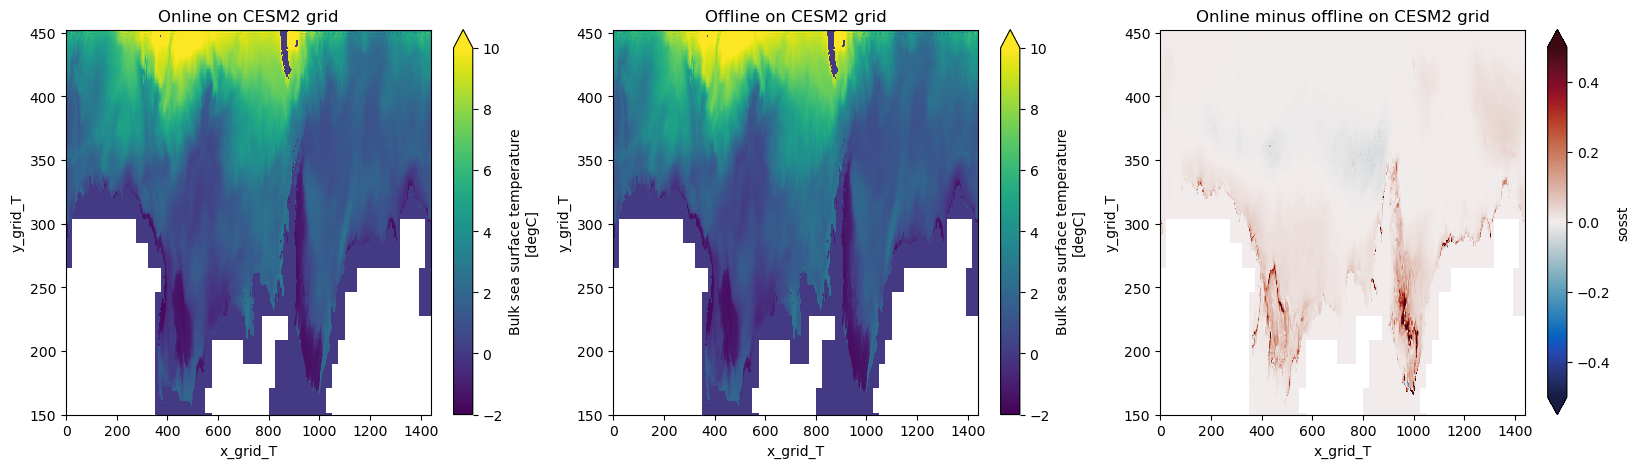

In [5]:
ts=0
var='sosst'
fig, ax = plt.subplots(1,3,figsize=(20,5))
bias2T[var].isel(time_counter=ts).plot(ax=ax[0], vmin=-2, vmax=10, ylim=(150,None))
bias4T[var].isel(time_counter=ts).plot(ax=ax[1], vmin=-2, vmax=10, ylim=(150,None))
(bias2T[var] - bias4T[var]).isel(time_counter=ts).plot(ax=ax[2], vmin=-0.5, vmax=0.5, ylim=(150,None), cmap=cmocean.cm.balance)
ax[0].set_title('Online on CESM2 grid')
ax[1].set_title('Offline on CESM2 grid')
ax[2].set_title('Online minus offline on CESM2 grid')

Text(0.5, 1.0, 'Online minus offline on CESM2 grid')

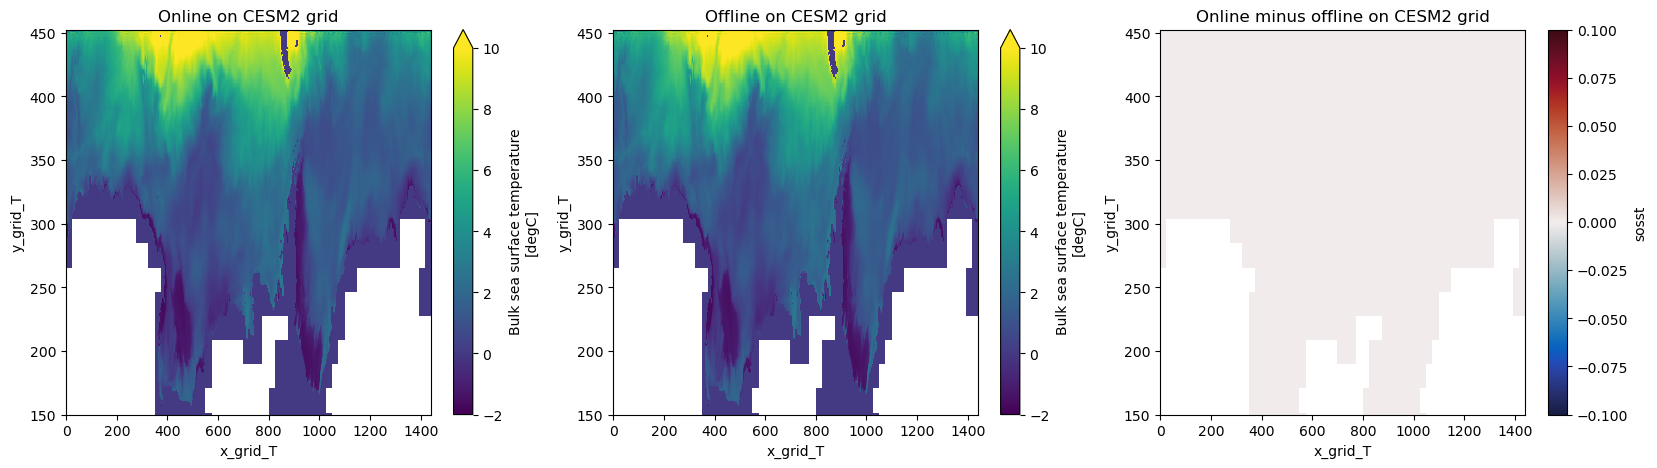

In [7]:
ts=0
var='sosst'
fig, ax = plt.subplots(1,3,figsize=(20,5))
bias2T[var].isel(time_counter=ts).plot(ax=ax[0], vmin=-2, vmax=10, ylim=(150,None))
bias3T[var].isel(time_counter=ts).plot(ax=ax[1], vmin=-2, vmax=10, ylim=(150,None))
(bias2T[var] - bias3T[var]).isel(time_counter=ts).plot(ax=ax[2], vmin=-0.1, vmax=0.1, ylim=(150,None), cmap=cmocean.cm.balance)
ax[0].set_title('Online on CESM2 grid')
ax[1].set_title('Offline on CESM2 grid')
ax[2].set_title('Online minus offline on CESM2 grid')

Text(0.5, 1.0, 'Online minus offline on CESM2 grid')

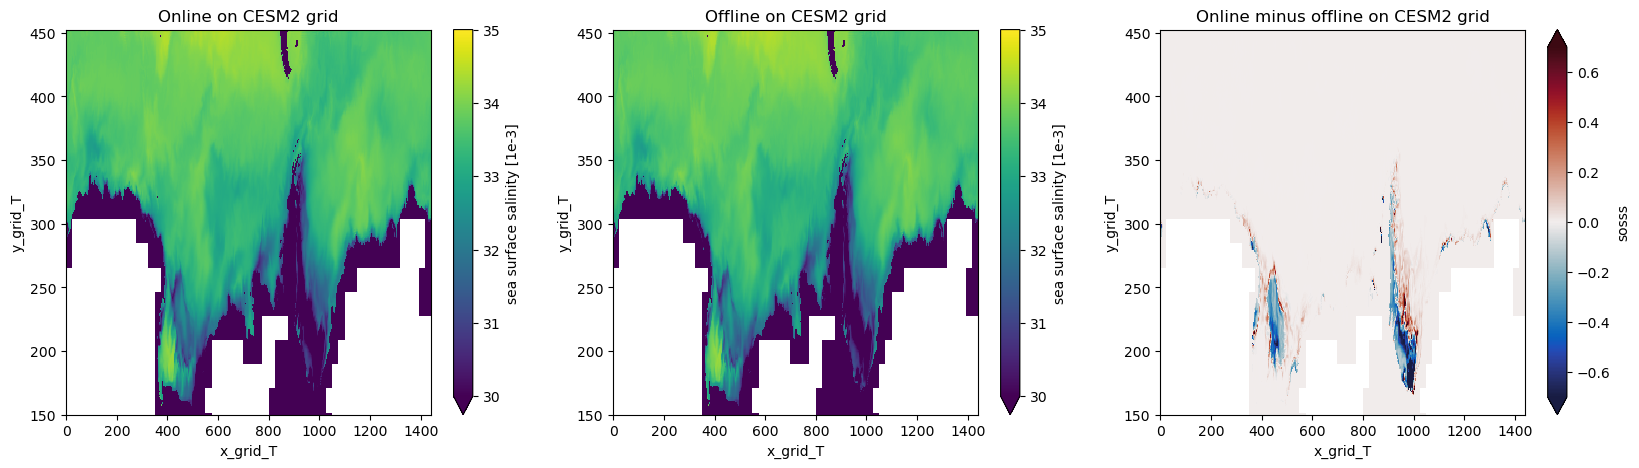

In [47]:
ts=0
var='sosss'
fig, ax = plt.subplots(1,3,figsize=(20,5))
bias2T[var].isel(time_counter=ts).plot(ax=ax[0], vmin=30, vmax=35, ylim=(150,None))
bias4T[var].isel(time_counter=ts).plot(ax=ax[1], vmin=30, vmax=35, ylim=(150,None))
(bias2T[var] - bias4T[var]).isel(time_counter=ts).plot(ax=ax[2], vmin=-0.7, vmax=0.7, ylim=(150,None), cmap=cmocean.cm.balance)
ax[0].set_title('Online on CESM2 grid')
ax[1].set_title('Offline on CESM2 grid')
ax[2].set_title('Online minus offline on CESM2 grid')

Text(0.5, 1.0, 'Online minus offline on CESM2 grid')

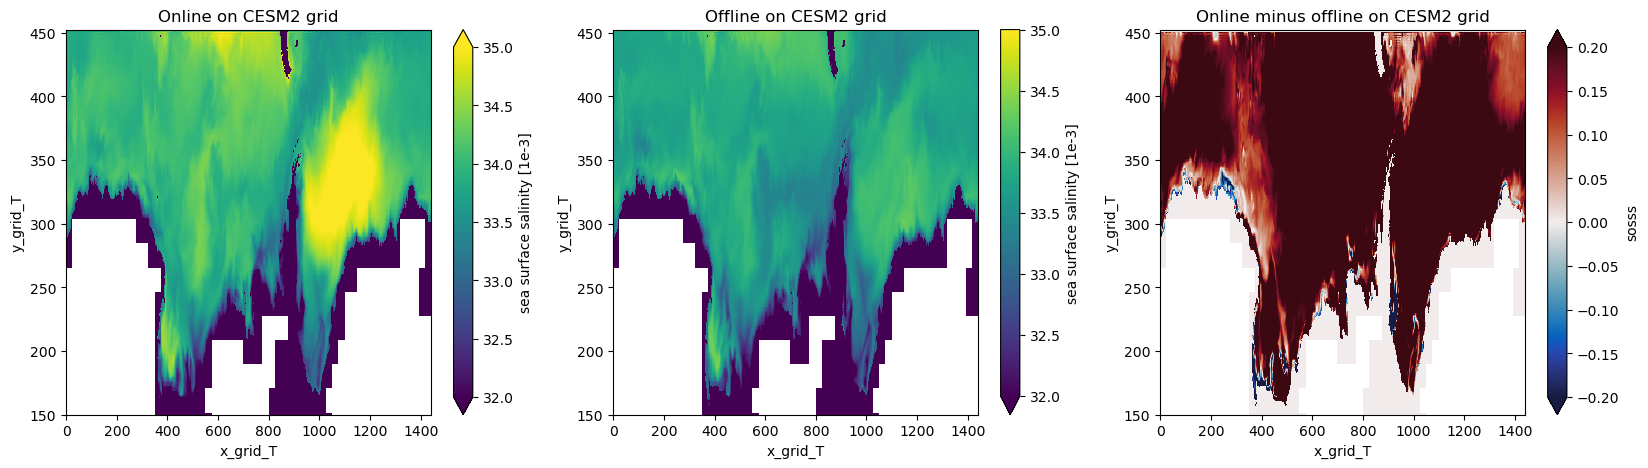

In [12]:
ts=2
var='sosss'
fig, ax = plt.subplots(1,3,figsize=(20,5))
bias2T[var].isel(time_counter=ts).plot(ax=ax[0], vmin=32, vmax=35, ylim=(150,None))
bias4T[var].isel(time_counter=ts).plot(ax=ax[1], vmin=32, vmax=35, ylim=(150,None))
(bias2T[var] - bias4T[var]).isel(time_counter=ts).plot(ax=ax[2], vmin=-0.2, vmax=0.2, ylim=(150,None), cmap=cmocean.cm.balance)
ax[0].set_title('Online on CESM2 grid')
ax[1].set_title('Offline on CESM2 grid')
ax[2].set_title('Online minus offline on CESM2 grid')